In [1]:
from numpy import *
from pylab import*
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline 


# Лабораторная работа №6# 
## Вариант №23
### Найти точку максимума функции методом покоординатного спуска. 
$$f(x, y) = x^2y+y^3+6xy+1, [x0=0, y0=-1]$$ 
### В окрестности точки минимума оценить овражность,построить линии уровня и траекторию поиска. Исследовать условия сходимости.
## Теоретическая справка:

### Алгоритм:

### Вход: функция  f
### Выход: экстремум функции
### 1. Инициализация некоторым значением $$x0 \in \mathbb{R}^n$$ 
### 2. для i=1...n фиксируем значения всех переменных кроме xi, получая одномерную функцию f(xi)проводим одномерную оптимизацию по переменной xi, любым методом одномерной оптимизацииесли выполен критерий останова, то возвращаем текущее значение x=(x1 , ... ,xn)
### повторять пока 
$$или$$
$$||x^{[k+1]}-x^{[k]}||\leq \epsilon$$
$$или$$
$$||f(x^{[k+1]})-f(x^{[k]})||\leq \epsilon$$

## Метод золотого сечения
### Описание метода
### Параметр на входе: $$\epsilon$$ - достаточно малая положительная константа, погрешность метода.
### 1. Определить $$x_1 = b-\frac{b-a}{\phi}, \quad x_2 = a+\frac{b-a}{\phi}$$
### 2. Повторять следующее действие:
###  Если $$f(x_1) > f(x_2):   a=x_1, \quad x_1=x_2, \quad x_2=b-(x_1-a);$$
###  Если $$f(x_1) < f(x_2):   b=x_2, \quad x_2=x_1, \quad x_1=a+(b-x_2);$$
### 5. До тех пор пока $$\frac{b-a}{2} \geq \epsilon;$$
### 6. Минимум  $$\tilde{x}^{\ast}=\frac{a+b}{2}$$.

#### Визуализация плоскости

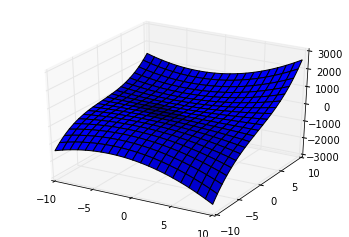

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.1)
x1,x2 = np.meshgrid(x1,x2)
F=x1*x1*x2+x2*x2*x2+6*x1*x2+1
surf = ax.plot_surface(x1, x2, F) 
plt.show()


#### Поиск точки максимума методом покоординатного спуска. Для нахождения минимума одной переменной взят метод злотого сечения

In [18]:
E=0.0001
ZS=(1+sqrt(5))/2

def f(x1, x2): 
    return (x1*x1*x2+x2*x2*x2+6*x1*x2+1)
def fx1(x1, x2): 
    return (2*x1*x2+6*x2)
def fx2(x1, x2): 
    return (x1*x1+3*x2*x2+6*x1)

x10=0
x20=-1
a=-100
b=-90
while not(fx1(a,x20)>0 and fx1(b, x20)<0):
    a=b
    b=b+10

i=0    
y1=b-(b-a)/ZS
y2=a+(b-a)/ZS
while ((b-a)/2>E):
    if (-f(y1, x20)>-f(y2,x20)):
        a=y1
        y1=y2
        y2=b-(y1-a)
    if (-f(y1, x20)<-f(y2,x20)):
        b=y2
        y2=y1
        y1=a+(b-y2)
    i=i+1
x10=(b+a)/2

a=-100
b=-90
while not(fx2(x10,a)>0 and fx2(x10, b)<0):
    a=b
    b=b+10   
    
j=0    
y1=b-(b-a)/ZS
y2=a+(b-a)/ZS
while ((b-a)/2>E):
    if (-f(x10, y1)>-f(x10,y2)):
        a=y1
        y1=y2
        y2=b-(y1-a)
    if (-f(x10, y1)<-f(x10,y2)):
        b=y2
        y2=y1
        y1=a+(b-y2)
    j=j+1
x20=(b+a)/2

print("Точка максимума =","(",x10,",",x20,")")
print("Кол-во итераций =", j+i)


Точка максимума = ( -3.00000596086 , -1.73207972445 )
Кол-во итераций = 31


#### Постоение линий уровня и траектории поиска

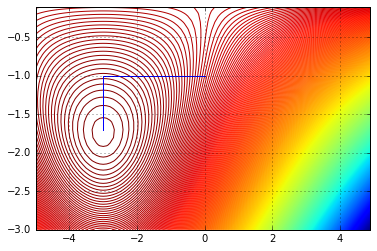

In [22]:
def f(xh,xj):
    return (xh*xh*xj+xj*xj*xj+6*xh*xj+1)
A=np.array([0,-1,-3,-1,-3,-1.7]).reshape((3,2))
x = np.arange(-5, 5, 0.1)
y = np.arange(-3, 0, 0.1)
xg,yg = np.meshgrid(x,y)
z=f(xg,yg)
pylab.contour(xg,yg,z,500)
pylab.plot(A[:,0] ,A[:,1])
pylab.grid()
pylab.show()

#### Оценка овражности с помощью матрицы Гессе и ее собственных значений

In [20]:
def f(x1, x2):
    return (x1*x1*x2+x2*x2*x2+6*x1*x2+1)
def grad(x1, x2):
    return np.array([2*x1*x2+6*x2, x1*x1+3*x2*x2+6*x1])
def gess(x1, x2):
    return np.array([2*x2,2*x1+6,6*x2,2*x1+6]).reshape((2,2))
x1=linspace(0,1,1)
x2=linspace(0,1,1)
g=gess(x1, x2)
linalg.eig(g)


(array([ 0.,  6.]), array([[ 1.        ,  0.70710678],
        [ 0.        ,  0.70710678]]))

### Оценку сходимости можно произвести с помощью:
### Теорема 1. Если квадратичная функция $f(x) = (х, Нх) + (b, х) + а$ с неотрицательно определенной матрицей $Н$ достигает своего минимального значения на $R^n$, то метод Флетчера-Ривса обеспечивает отыскание точки минимума не более чем за $n$ шагов. 
### Вывод: проделав лабораторную работу мы решили задачу минимизации данной функции предложеным методом сопряженых градиентов (Метод Флетчера - Ривса). Нашли точку максимума функции $$f(x, y) = 4-2(x-3)^2-(y-2)^2,$$ 
$$max=[x=-3,y=-1.732]$$

## Работу выполнил студент 431гр. Толкачев Никита